# 1.**Data Preparation**

# **Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Load the dataset**

In [2]:
df= pd.read_csv(r"D:\RATHNA\PYTHON\Kaggle\card_transdata.csv")


In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
df.shape

(1000000, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


**Basic statistics of the dataset**

In [11]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Check for missing values
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [15]:
df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

<Axes: xlabel='fraud'>

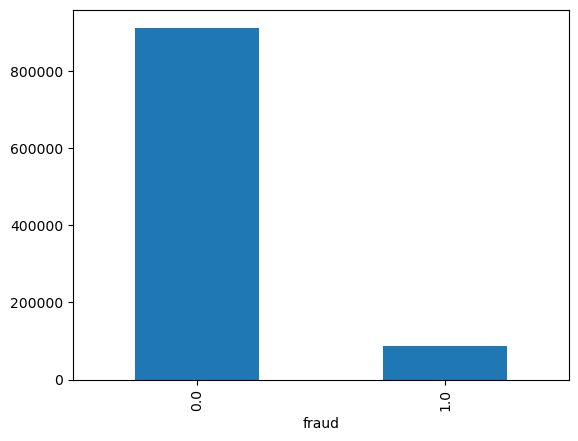

In [17]:
# Check the distribution of the target variable (fraud)
df['fraud'].value_counts().plot(kind='bar')

 # 2: **Exploratory Data Analysis (EDA)**

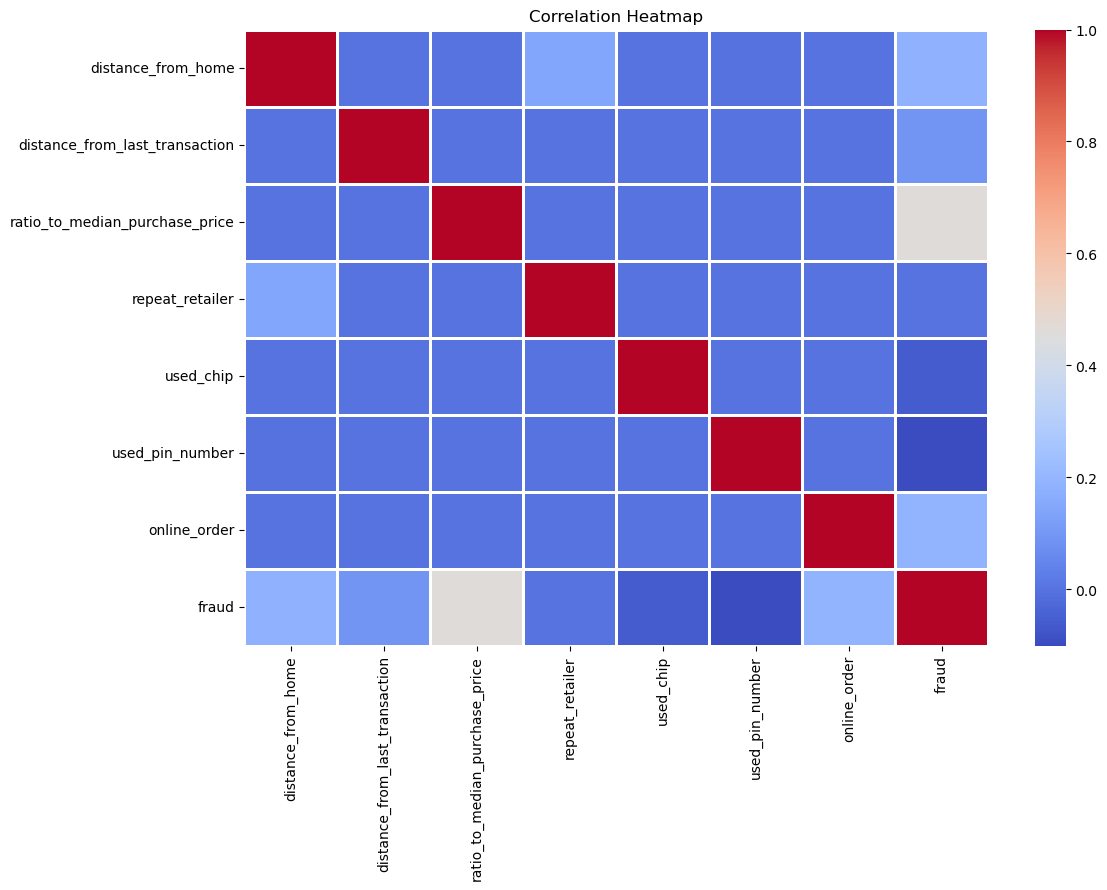

In [67]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

# 3: **Data Splitting**

In [19]:
X = df.drop('fraud', axis=1)  
y = df['fraud'] 

In [21]:
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [23]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)

# 4: **Model Training**

In [39]:
model = LogisticRegression(max_iter=200)

In [41]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# 5: **Model Evaluation**

In [72]:
# Predicting the classes
y_pred = model.predict(X_test)

In [42]:
train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(train_prediction, y_train)

In [43]:
training_accuracy

0.95855

In [44]:
test_prediction = model.predict(X_test)
testing_accuracy = accuracy_score(test_prediction, y_test)

In [45]:
testing_accuracy

0.95862

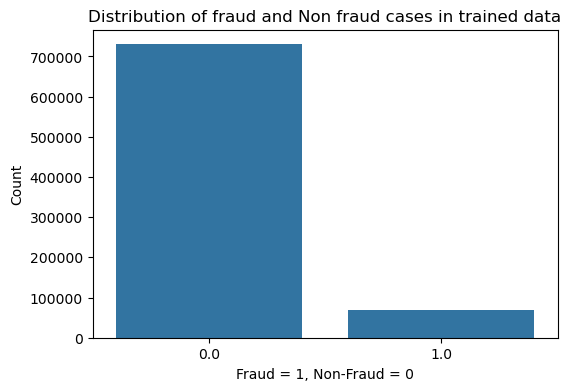

In [80]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Distribution of fraud and Non fraud cases in trained data")
plt.xlabel("Fraud = 1, Non-Fraud = 0")
plt.ylabel("Count")
plt.show()

In [82]:
y_train.value_counts()

fraud
0.0    730021
1.0     69979
Name: count, dtype: int64

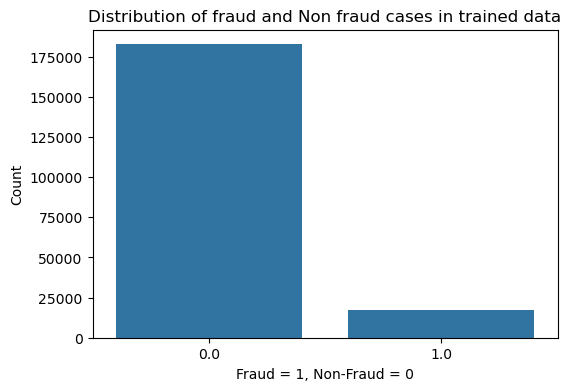

In [84]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_test)
plt.title("Distribution of fraud and Non fraud cases in trained data")
plt.xlabel("Fraud = 1, Non-Fraud = 0")
plt.ylabel("Count")
plt.show()

In [86]:
y_test.value_counts()

fraud
0.0    182576
1.0     17424
Name: count, dtype: int64

In [76]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[181340   1236]
 [  7040  10384]]


In [78]:
# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182576
         1.0       0.89      0.60      0.72     17424

    accuracy                           0.96    200000
   macro avg       0.93      0.79      0.85    200000
weighted avg       0.96      0.96      0.95    200000

